# Flare 2023/06/09

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

In [ ]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:/solar flares/data/2023-06-09/fits/"

maximum = 58 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return f"{folder_path}nb_6563_2023-06-09T17_01_07_17_01_07=0-57_corrected_export2023-07-25T11_19_08_im.fits"
ttff = timeframe_to_filename_fits



In [3]:
head0 = f.getheader(ttff(0))
head0

SIMPLE  =                    T / Written by IDL:  Thu Jun 22 12:19:40 2023      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 2783 / Number of positions along axis 1               
NAXIS2  =                 2773 / Number of positions along axis 2               
NAXIS3  =                   33 / Number of positions along axis 3               
NAXIS4  =                    1 / Number of positions along axis 4               
NAXIS5  =                   58 / Number of positions along axis 5               
EXTEND  =                    T / The file has extension(s).                     
PC1_1   =              1.00000 / No rotations                                   
PC2_2   =              1.00000 / No rotations                                   
PC3_3   =              1.00000 / No rotations                                   
PC4_4   =              1.000

In [4]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for hdl in io:
        print(hdl)
        print(np.shape(hdl.data))
        print(hdl.data[0][0])
    tlist2 = io[3].data
    pos = io[1].data

# shape data: [(58, 1, 33, 2773, 2783)-data,  positons , array SIM_XY????, date and time frames,  
# (58, 1, 1, 2773, 2783)-data, terug date+time frames, nog eens date+time frames, en nog eens, array orde e10,  
# frame umbers , ....     errors?,  errors?]


wvl = pos[0][0][:,:,0,0,2][0]
np.save('line_data/wav_sstHa.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001E696CE8490>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E696CFE1D0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E696CFF2D0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E696D002D0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001E696D01250>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E696D02350>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E696D02FD0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E696D03C50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E696D0C910>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E696D0D550>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E696D0E750>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E696D0F650>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E696D18590>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E696D19210>, <astropy.io.fits.hdu.ta

 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


In [5]:
pos[0][0][:,:,0,0,2][0]

array([656.0296042, 656.0546042, 656.0796042, 656.1046042, 656.1296042,
       656.1546042, 656.1796042, 656.1896042, 656.1996042, 656.2096042,
       656.2196042, 656.2296042, 656.2396042, 656.2496042, 656.2596042,
       656.2696042, 656.2796042, 656.2896042, 656.2996042, 656.3096042,
       656.3196042, 656.3296042, 656.3396042, 656.3496042, 656.3596042,
       656.3696042, 656.3796042, 656.4046042, 656.4296042, 656.4546042,
       656.4796042, 656.5046042, 656.5296042], dtype='>f8')

In [6]:
tlist = np.array(tlist2[0])
tlist3 = tlist[0,:,0,0,0, 0]
tlist3[2][17:], tlist3

('19:00:37',
 array(['DATE: 2023-06-18T19:00:01', 'DATE: 2023-06-18T19:00:18',
        'DATE: 2023-06-18T19:00:37', 'DATE: 2023-06-18T19:00:55',
        'DATE: 2023-06-18T19:01:12', 'DATE: 2023-06-18T19:01:28',
        'DATE: 2023-06-18T19:01:45', 'DATE: 2023-06-18T19:02:04',
        'DATE: 2023-06-18T19:02:22', 'DATE: 2023-06-18T19:02:41',
        'DATE: 2023-06-18T19:02:57', 'DATE: 2023-06-18T19:03:14',
        'DATE: 2023-06-18T19:03:32', 'DATE: 2023-06-18T19:03:49',
        'DATE: 2023-06-18T19:04:06', 'DATE: 2023-06-18T19:04:22',
        'DATE: 2023-06-18T19:04:39', 'DATE: 2023-06-18T19:04:56',
        'DATE: 2023-06-18T19:05:14', 'DATE: 2023-06-18T19:05:32',
        'DATE: 2023-06-18T19:05:50', 'DATE: 2023-06-18T19:06:07',
        'DATE: 2023-06-18T19:06:24', 'DATE: 2023-06-18T19:06:41',
        'DATE: 2023-06-18T19:06:58', 'DATE: 2023-06-18T19:07:15',
        'DATE: 2023-06-18T19:07:31', 'DATE: 2023-06-18T19:07:48',
        'DATE: 2023-06-18T19:08:05', 'DATE: 2023-06-18T19:08:22

In [7]:
time_list = [t[17:] for t in tlist3]
time_list

['19:00:01',
 '19:00:18',
 '19:00:37',
 '19:00:55',
 '19:01:12',
 '19:01:28',
 '19:01:45',
 '19:02:04',
 '19:02:22',
 '19:02:41',
 '19:02:57',
 '19:03:14',
 '19:03:32',
 '19:03:49',
 '19:04:06',
 '19:04:22',
 '19:04:39',
 '19:04:56',
 '19:05:14',
 '19:05:32',
 '19:05:50',
 '19:06:07',
 '19:06:24',
 '19:06:41',
 '19:06:58',
 '19:07:15',
 '19:07:31',
 '19:07:48',
 '19:08:05',
 '19:08:22',
 '19:08:39',
 '19:08:55',
 '19:09:12',
 '19:09:29',
 '19:09:45',
 '19:09:58',
 '19:10:12',
 '19:10:25',
 '19:10:39',
 '19:10:52',
 '19:11:06',
 '19:11:19',
 '19:11:33',
 '19:11:46',
 '19:12:00',
 '19:12:14',
 '19:12:27',
 '19:12:40',
 '19:12:53',
 '19:13:07',
 '19:13:23',
 '19:13:40',
 '19:13:56',
 '19:14:12',
 '19:14:29',
 '19:14:45',
 '19:15:02',
 '19:15:18']

In [ ]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0] # TODO: werk hier verder
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [ ]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

True
the maximum attained value in frame 0 is nan and the 98 percile is nan


array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype='>f4')

In [10]:
reload(un)

vertices = [(600, 60), (40, 823), (832, 1400), (1280, 770)]

Ha = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstHa.npy', number_of_frames=maximum,
                 time=time_list, name_of_line='Ha23', thresh=[0, np.percentile(datacube(0), 99.5)],  boundary_methode='search', 
                 boundary_arguments = {"error":0.01}, with_stokes=True, with_time=True, alternative_datacube=datacube)

# Ha.datacube
# np.shape(Ha.datacube), Ha.datacube(0)[0:30:5,10:20:5, 100:200:30], 
Ha.boundary


E:/solar flares/data/2023-06-09/fits/nb_6563_2023-06-09T17_01_07_17_01_07=0-57_corrected_export2023-07-25T11_19_08_im.fits
s=(33, 2773, 2783)
the shape of the data is (58, '??', 33, 2773, 2783)
the wavelengths are self._wavel = array([656.0296042, 656.0546042, 656.0796042, 656.1046042, 656.1296042,
       656.1546042, 656.1796042, 656.1896042, 656.1996042, 656.2096042,
       656.2196042, 656.2296042, 656.2396042, 656.2496042, 656.2596042,
       656.2696042, 656.2796042, 656.2896042, 656.2996042, 656.3096042,
       656.3196042, 656.3296042, 656.3396042, 656.3496042, 656.3596042,
       656.3696042, 656.3796042, 656.4046042, 656.4296042, 656.4546042,
       656.4796042, 656.5046042, 656.5296042], dtype='>f8')


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
# Ha.calculate__FOV_spect_over_time()

In [ ]:
secs = un.get_TIME(Ha)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{Ha.shape=}')

the mean cadence is 3.9665427509293614 seconds for this line!
Ha.shape=(270, 1, 9, 1424, 1424)


[[1.0, 1.125], [4.0, 1.125], [7.0, 1.125]]
The guessed filters are [[1.0, 1.125], [4.0, 1.125], [7.0, 1.125]]


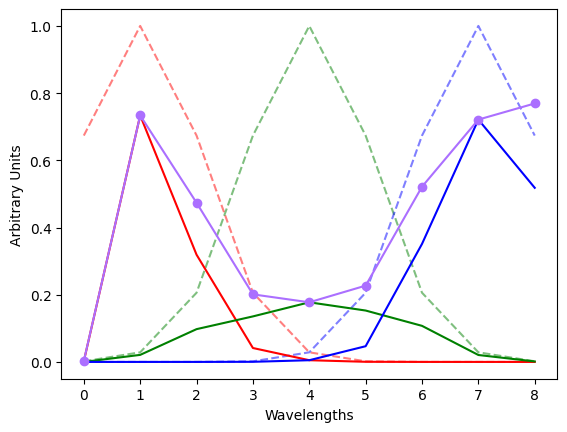

In [ ]:
# %matplotlib inline
gf = un.guess_filters(9)
print(gf)
Ha.update_filters(None)# [[3,2], [7,2], [11,2]]
Ha.plot_filt(880,900)
plt.show()

the number of frames is 270
frame number 0 at time 12:39:53


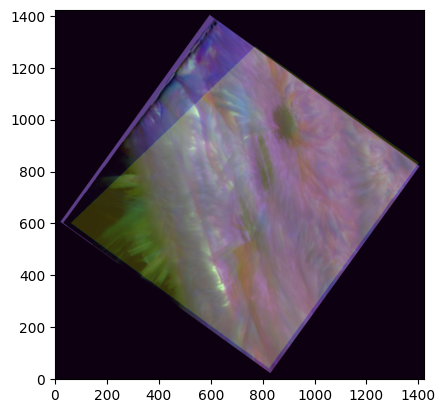

(1424, 1424, 3)
frame number 45 at time 12:42:52


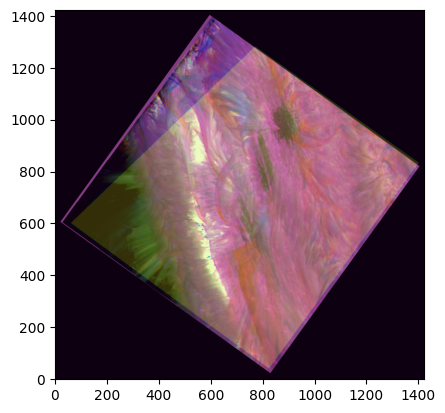

(1424, 1424, 3)
frame number 90 at time 12:45:50


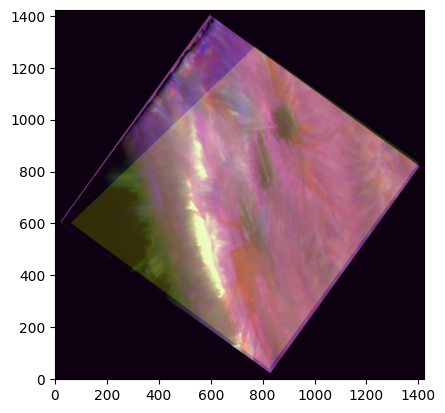

(1424, 1424, 3)
frame number 135 at time 12:48:49


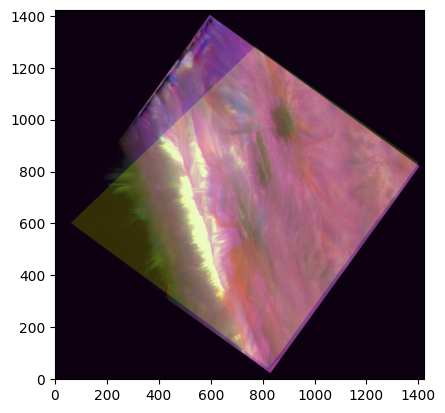

(1424, 1424, 3)
frame number 180 at time 12:51:47


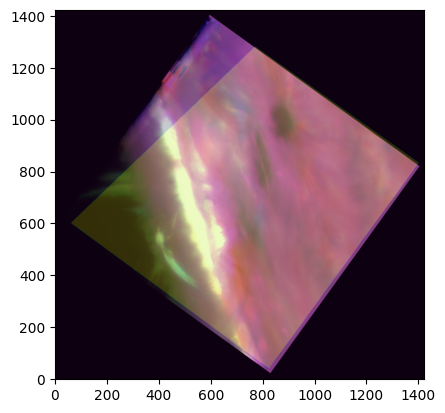

(1424, 1424, 3)
frame number 225 at time 12:54:45


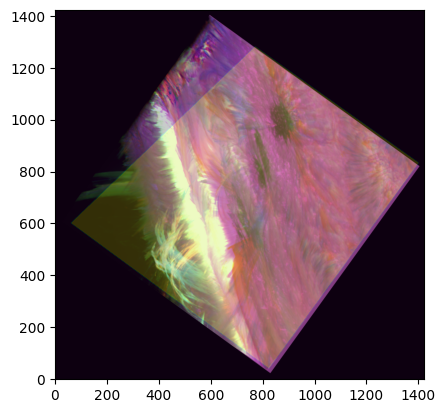

(1424, 1424, 3)


In [ ]:
# %matplotlib widget
print(f'the number of frames is {Ha._number_of_frames}')
for frame in range(0 ,Ha._number_of_frames, 45):
    # frame=0
    Ha.ccp_frame(frame,Show=False)
    print(f'frame number {frame} at time {Ha._time[frame]}')
    plt.imshow(Ha.current_ccp, origin='lower')
    # plt.imshow(Ha.calculate_boundary(frame=frame), alpha=0.2, origin="lower")

    plt.imshow(Ha.boundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(Ha.current_ccp))#,np.shape(Ha.boundary))

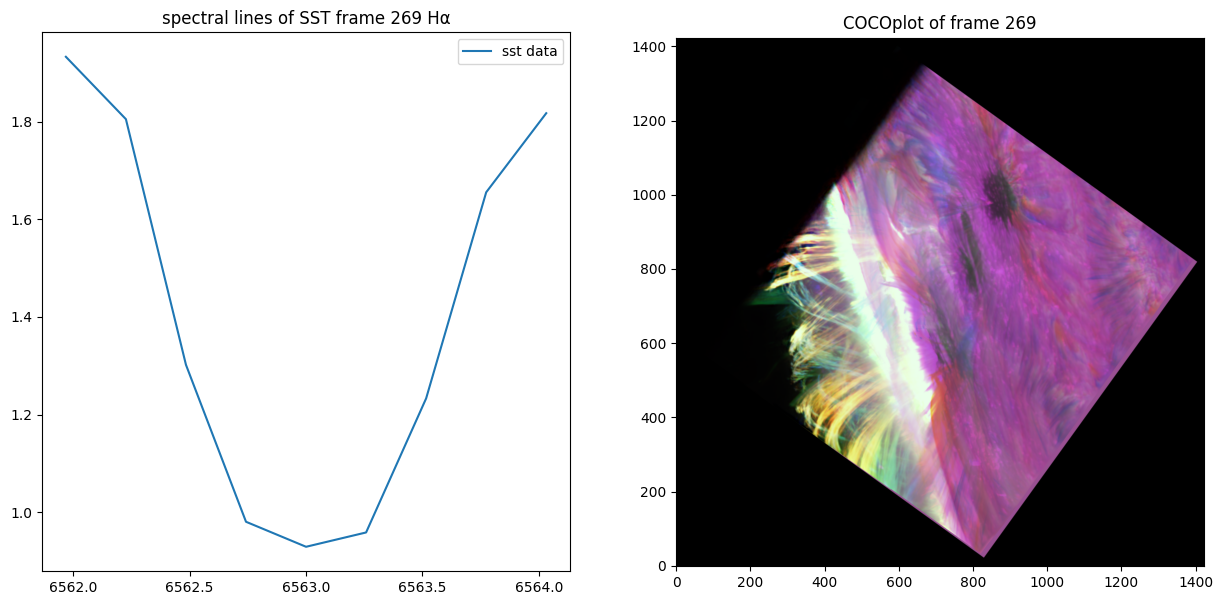

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 269
Ha.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
Ha.frame_integrated_spect(frame)
ax[0].plot(Ha._wavel, Ha.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(Ha.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()


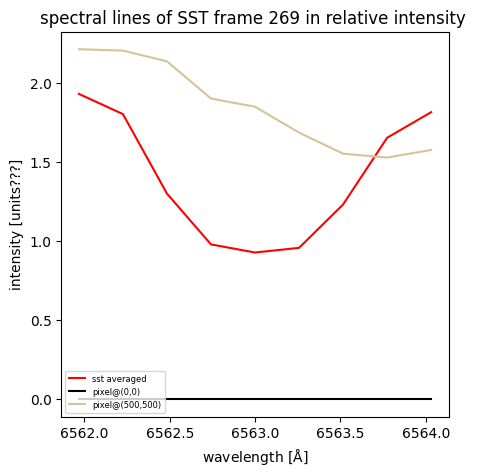

In [ ]:
Ha.current_ccp[0:30:10,0:60:20,:]
Ha.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

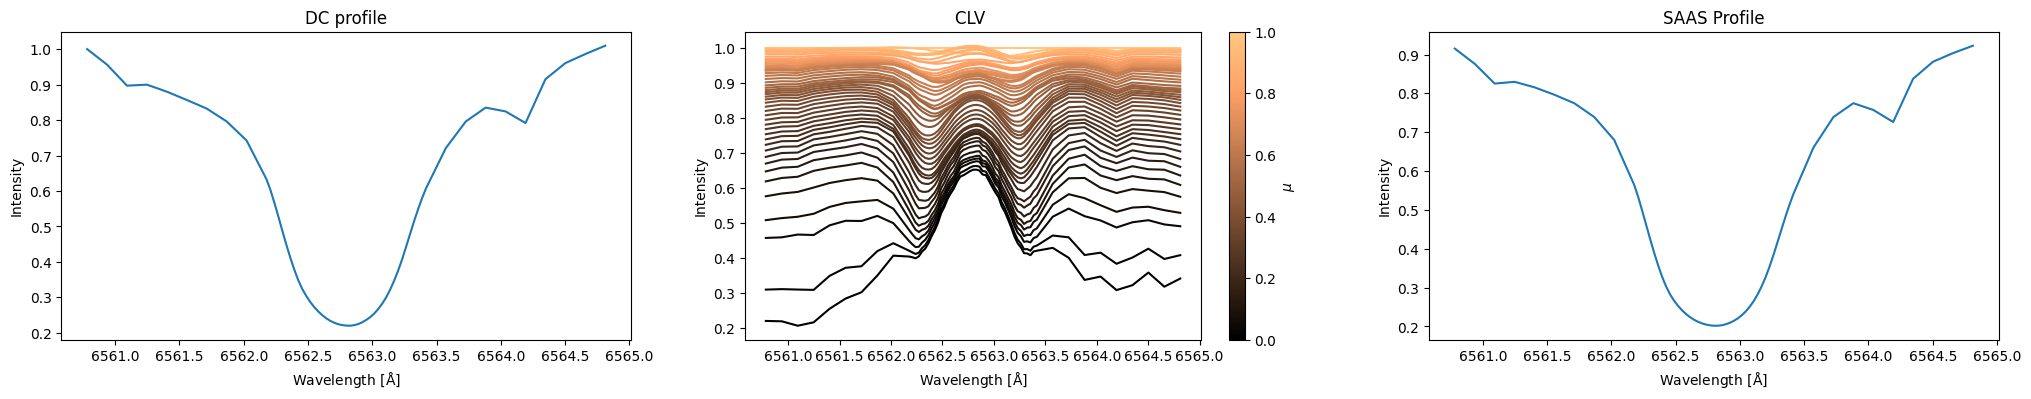

6562.797056366136 6562.797056366135


In [ ]:
reload(un)
theor_Ha = un.linestudier('E:/solar flares/data/2017-09-06/fits/6563_clv.fits', atlas=None, nr=101)
print(np.median(theor_Ha.sst_wav), np.mean(theor_Ha.sst_wav))

## Calculating the $\mu$ !!!!! 


In [ ]:
Ha.shape

(270, 1, 9, 1424, 1424)

In [ ]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(Ha.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        # print(add_enters(str(hdu.header), length_row=79))
        try: 
            print("x =", hdu.header['CRVAL1'], "y=", hdu.header['CRVAL2'])
        except KeyError:
            pass

# there is no coordinate information present! We take the mu from Beam electrons as a source of H&alpha; flare ribbons

x = -878.852300514 y= -304.754577918


z=972.0082304178293, width = 114.27063735072942
[-935.9876191893648, -821.7169818386353, -361.8898965933647, -247.61925924263528]
does MU contain nan's? True


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_6276\1068542446.py:11: RuntimeWarning: invalid value encountered in sqrt
  mu  = (1-(x**2 + y**2)/radius**2)**0.5


AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.12468302652962168 for timeframe 10
Coundourplot succesfully saved.


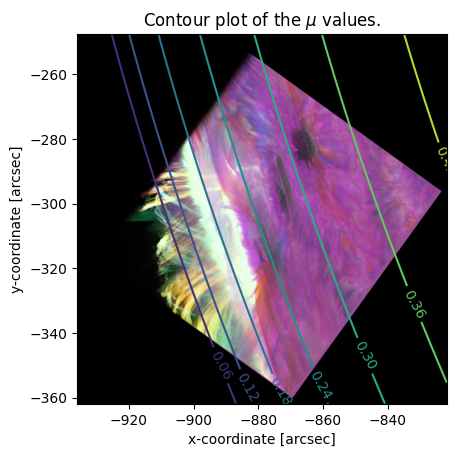

In [ ]:
def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

# 60 arcsec is de zijde van (20,600) tot (800, 20) pixels op 1424x1242 pixles
# by pythagoras 
z = ((800-20)**2 + (600-20)**2 )**0.5
width = 60 * 1424/z*1.3
print(f"{z=}, {width = }")

position = (-878.852300514, -304.754577918)

fxp = [position[0] - width / 2, position[0] + width / 2 ]
fyp = [position[1] - width / 2, position[1] + width / 2 ]
fxp.extend(fyp)
print(fxp)

x = np.linspace(fxp[0], fxp[1], Ha.shape[4])
y = np.linspace(fyp[0], fyp[1], Ha.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        K = MU * over.boundary
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=Ha, save=True, save_name=Ha.name_of_line, timeFrame=10)
sst_data = Ha
theor_line = theor_Ha
set_mu(Ha, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Ha.index_mu], theor_line.sst_clv[theor_Ha.index_mu][0], clv_fit(mu, theor_line)


c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:382: RuntimeWarning: invalid value encountered in sqrt
  ipts = _np.vstack([_np.atleast_2d(x), _np.atleast_2d(y), _np.atleast_2d(_np.sqrt(1.-(x**2+y**2)))])
c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:358: RuntimeWarning: invalid value encountered in arcsin
  mu = _np.cos(_np.arcsin(rad_dist))


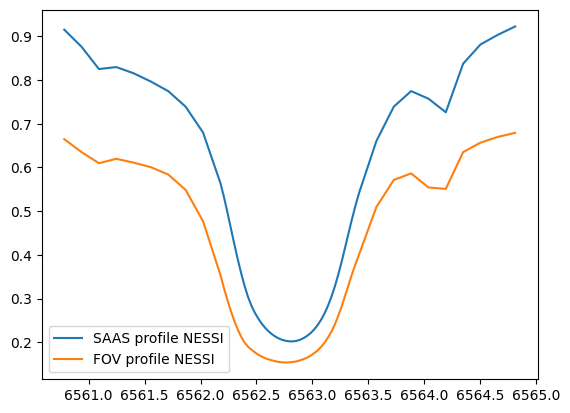

In [ ]:
theor_Ha.set_fov( xx, yy, Ha.boundary, sr=959.63)

When we were scaling the width by 1.3:

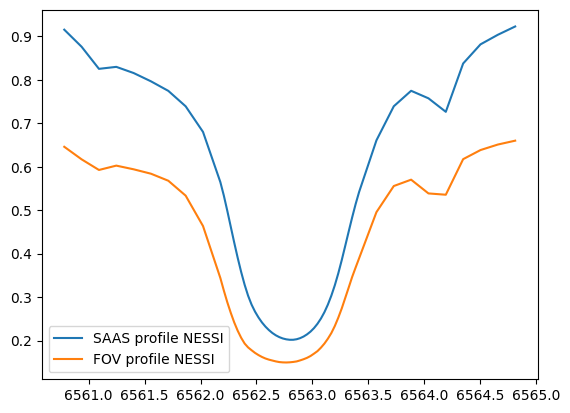

## Finding a suitable quiet sun patch

In [ ]:
frame, Ha.shape

(269, (270, 1, 9, 1424, 1424))

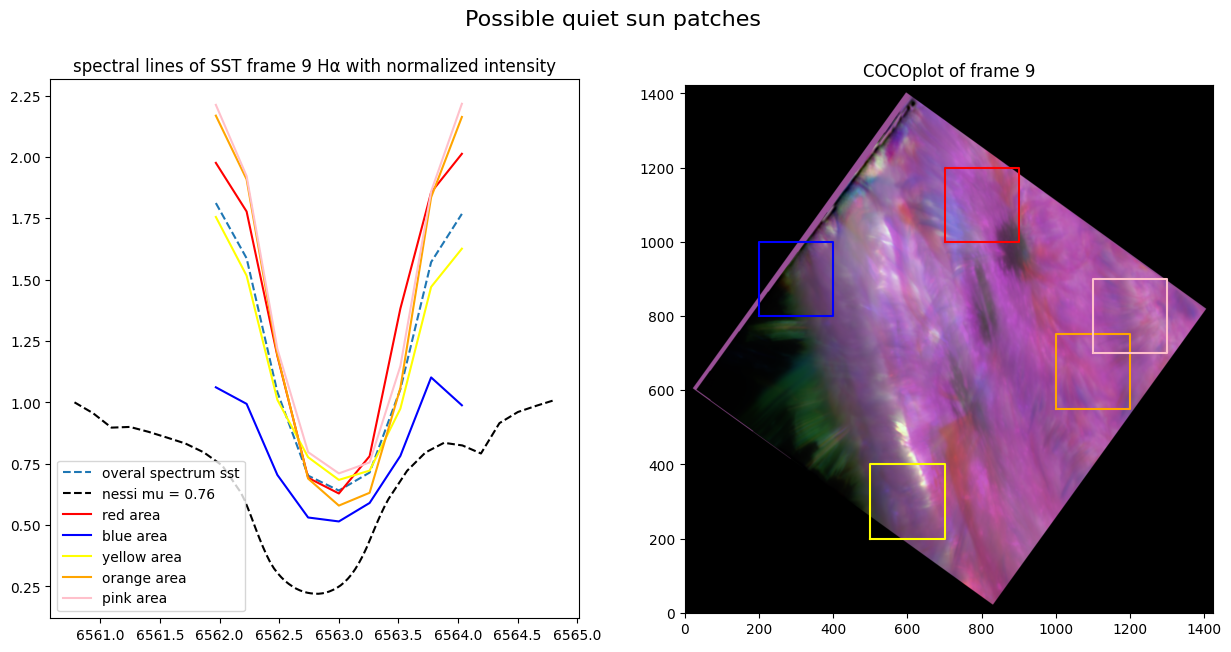

In [ ]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

Ha.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(700,900),(1000,1200)], [(200,400), (800, 1000)], [(500, 700), (200, 400)], [(1000,1200),(550,750)], [(1100,1300),(700, 900)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
Ha.frame_integrated_spect(frame)
ax[0].plot(Ha._wavel, Ha.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.sst_dc*theor_Ha.sst_clv[0] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(Ha.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(Ha._wavel, Ha.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_Ha.png')
plt.show()


### The Yellow patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [ ]:
color_wanted_patch = 'pink'

the edges of the patch are denoted by the xlim: (1100, 1300) and ylim: (700, 900)


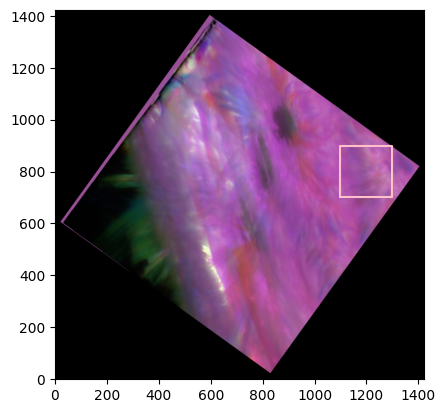

{'frame': 9, 'xlim': (1100, 1300), 'ylim': (700, 900), 'color': 'pink'}

In [ ]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

Ha.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
Ha.quiet_sun

The quiet sun is pick at x (-839.6646188364484, -297.68794679581856) with average              mu 0.37170585085462843


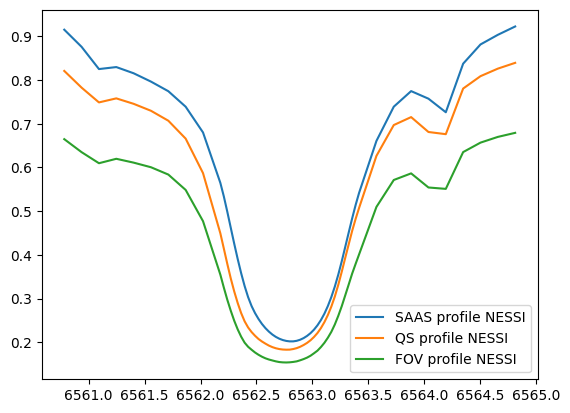

In [ ]:
theor_Ha.set_quiet_sun(xlim=xlim, ylim=ylim)


[6561.96799994 6562.22599995 6562.48399997 6562.74199998 6563.
 6563.25800002 6563.51600003 6563.77400005 6564.03200006] [2.21186185 1.92179585 1.21803284 0.79717702 0.71056116 0.75544816
 1.14754975 1.85888767 2.21630454] [0.61453353 0.39413491 0.21557753 0.1831661  0.20857601 0.35736965
 0.58338544 0.70250909 0.68221833]
[0.20294363 3.45567687]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 283.03333980317274
        x: [ 2.506e-01  3.176e+00]
      nit: 10
      jac: [ 9.918e-05  1.297e-04]
 hess_inv: [[ 6.499e-06  1.958e-06]
            [ 1.958e-06  6.085e-05]]
     nfev: 88
     njev: 26


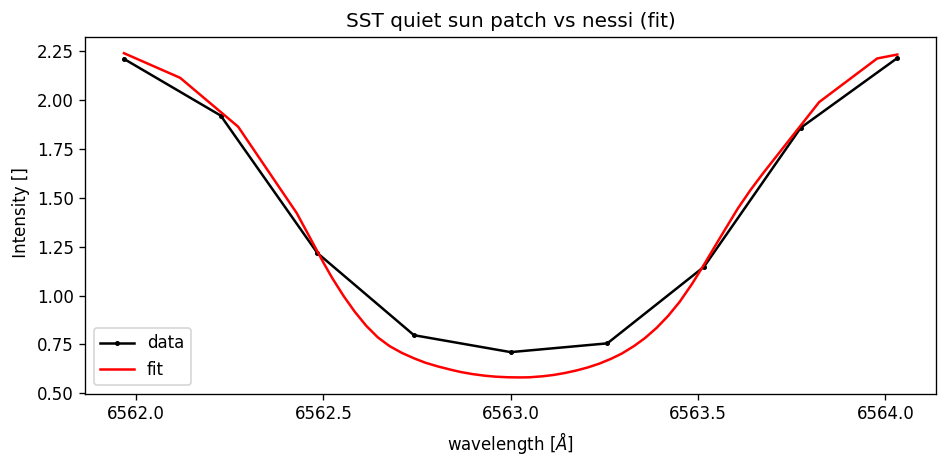

de p-waarde is  1.0398304534700927e-06 
Chi^2 reduced= 40.43333425759611 
aantal vrijheidgraden= 7 
chi^2= 283.03333980317274
we behouden de fit tot op een betrouwbaarheidsniveau van  1.0398304534700927e-06 
Oftewel verwerp als p-waarde <lpha-niveau 


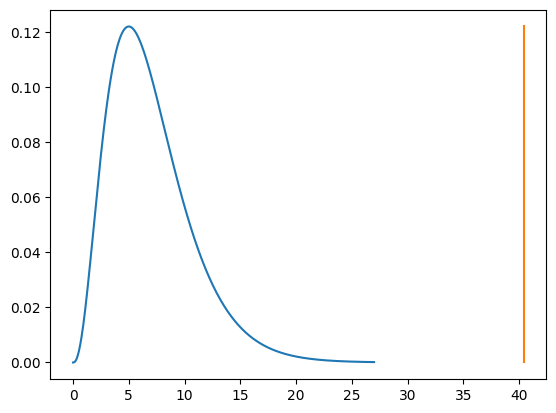

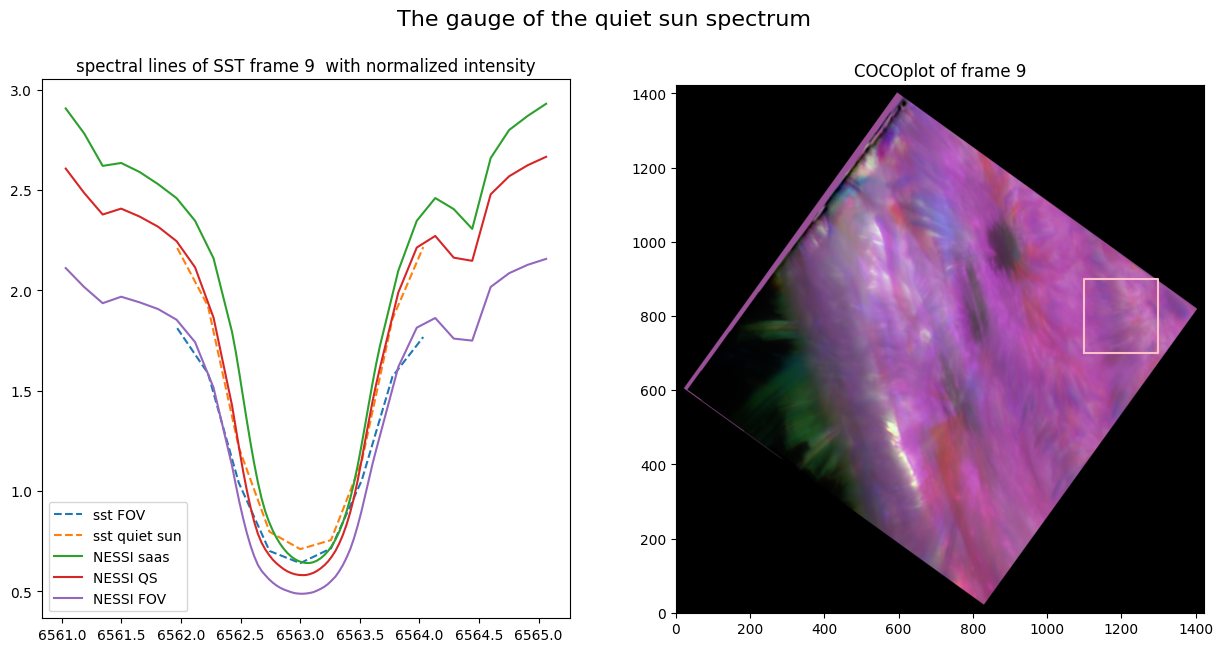

In [ ]:
reload(un)
un.fit_qs_to_NESSI(theor_Ha, Ha)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [ ]:
sst_data = Ha
Ha.shape

(270, 1, 9, 1424, 1424)

In [ ]:
Ha.calculate__FOV_spect_over_time()

In total 270 frames.
Now calculating frame:
269

In [ ]:
sst_data.quiet_sun

{'frame': 9, 'xlim': (1100, 1300), 'ylim': (700, 900), 'color': 'pink'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [269] at time ['t=12:57:40 UT'].
The areafactor for THIS flare is 0.0018655045742858262 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 149.92%.


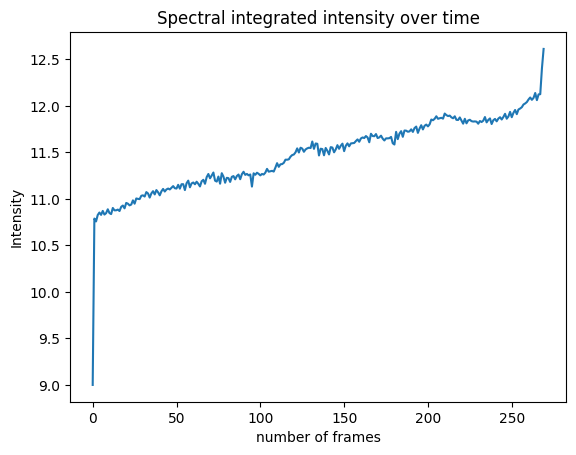

In [ ]:
reload(un)
un.save_for_further_analysis(Ha, theor_Ha)


# Movie Making

frame: 0, 12:39:53, total number of frames: 270 


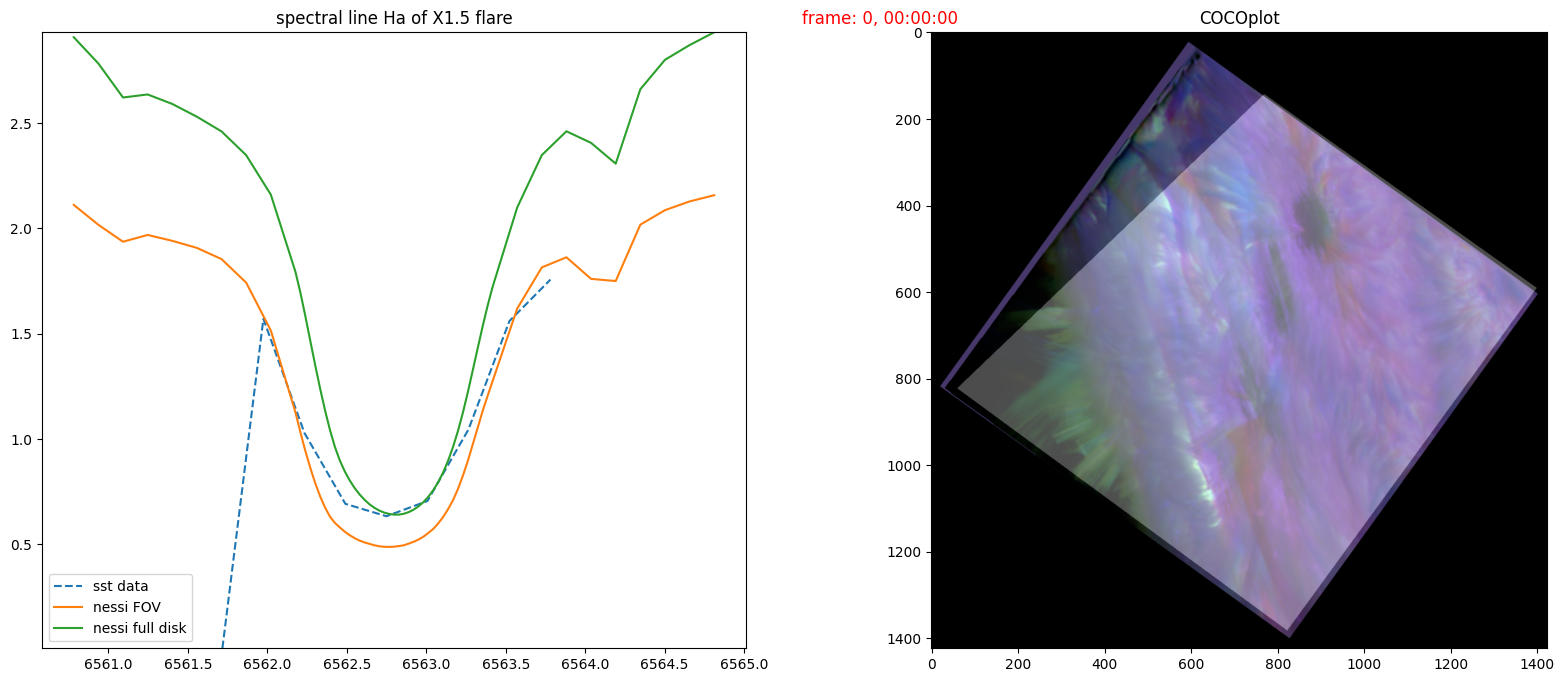

0 0 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96 98 100 102 104 106 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250 252 254 256 258 260 262 264 266 

In [ ]:
# fill in here all arguments
theor_line = theor_line
sst_data = Ha
name_of_flare = 
name_of_line = "Ha"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step=2, show_boundary=True)

In [ ]:
# exit()